

(Perceptron)
By utilizing the make_blobs function in sklearn, a dataset of 100 points with two classes is generated. We then implement the perceptron algorithm from scratch and observe the intermediate hyperplanes generated during the training process.

In [ ]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.datasets import make_blobs
# Generating the dataset
X,y = make_blobs(n_samples = 100, centers = 2, random_state = 42)

In [ ]:
aug_X = np.ones((100, 3))   # Augumented matrix with last column containing bias
aug_X[:, 1:3] = X   # Making the first two columns of augumented matrix as the matrix X

In [ ]:
# Initializing weights randomly. We can do this in many ways
weights = np.random.rand(3)
print(weights)

[0.36040971 0.22642039 0.66087663]


In [ ]:
# Note that convergence is very fast, the model gets stabilized by 3 iterations. Nevertheless, 10 iterations have been done
# In the second question, stopping criteria was "error < epsilon"

# This is done so as to ensure both the stopping criteria work on the same dataset

[0.36040971 0.22642039 0.66087663]


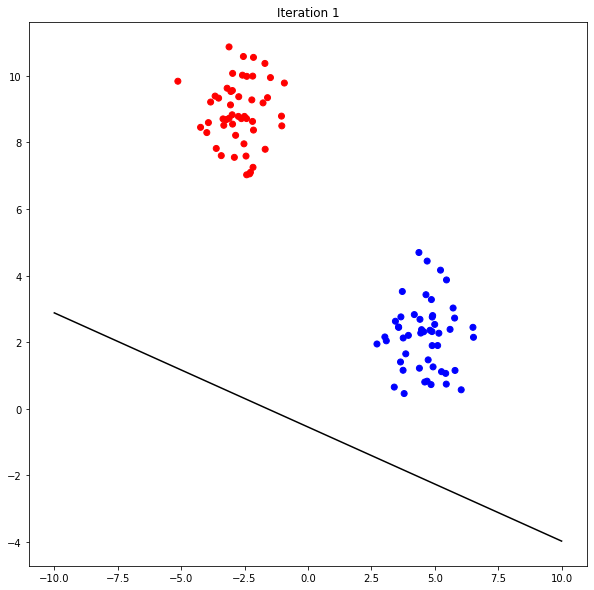

[ 0.36040971  8.93772233 -5.14077879]


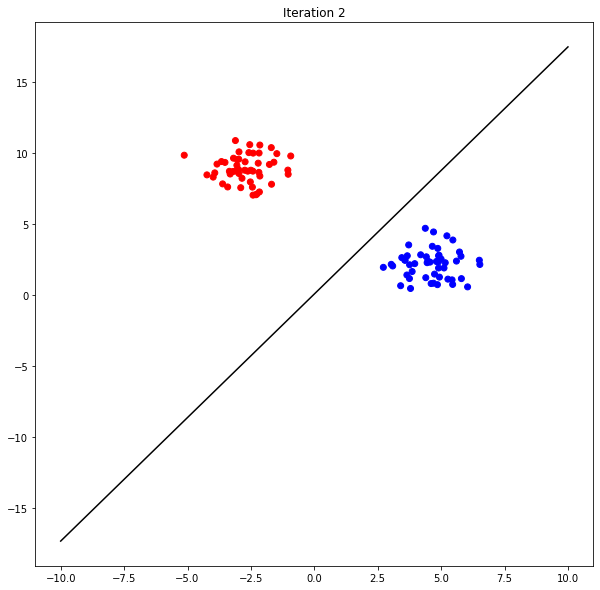

[ 0.36040971  8.93772233 -5.14077879]


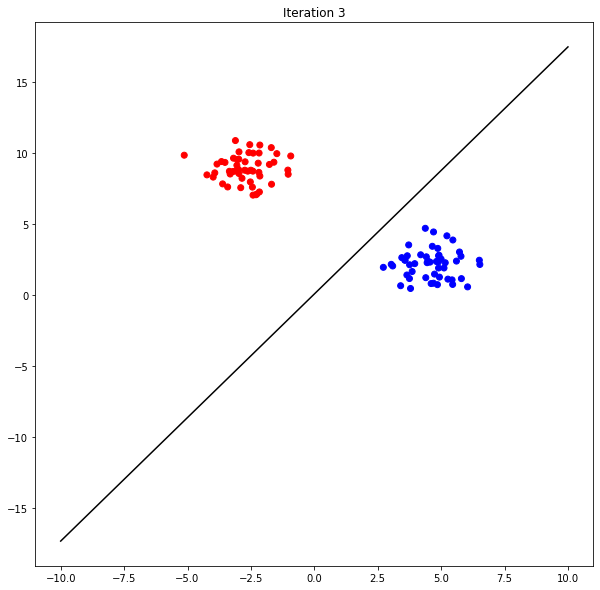

[ 0.36040971  8.93772233 -5.14077879]


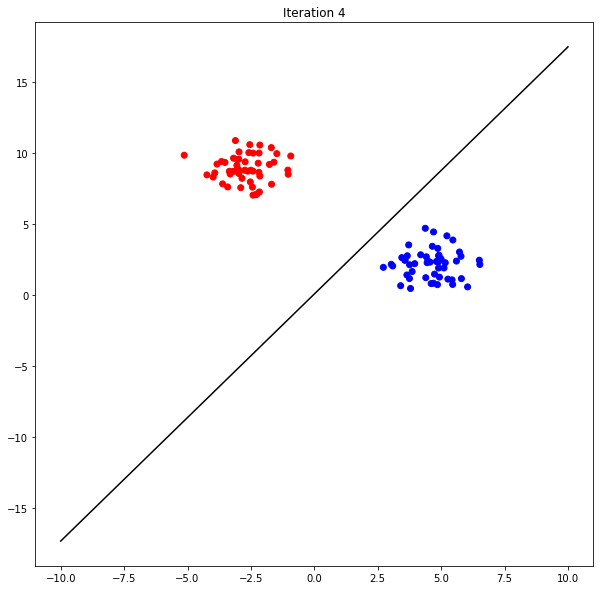

[ 0.36040971  8.93772233 -5.14077879]


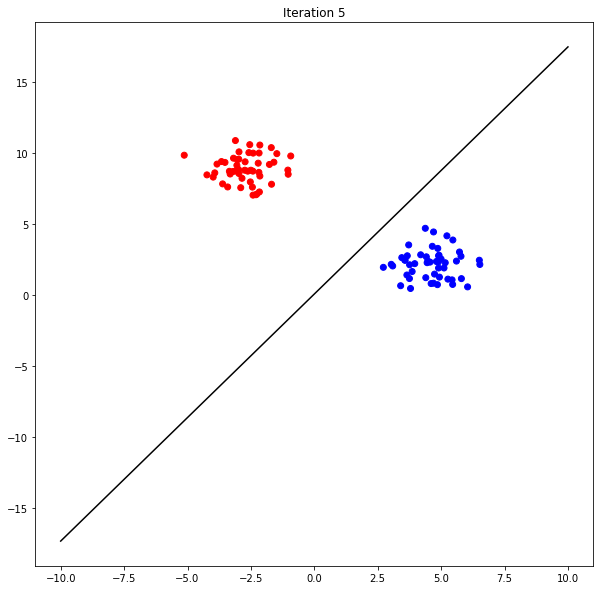

[ 0.36040971  8.93772233 -5.14077879]


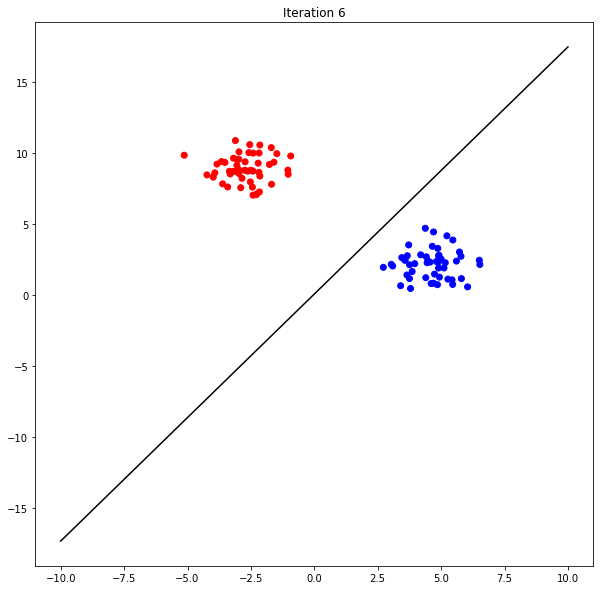

[ 0.36040971  8.93772233 -5.14077879]


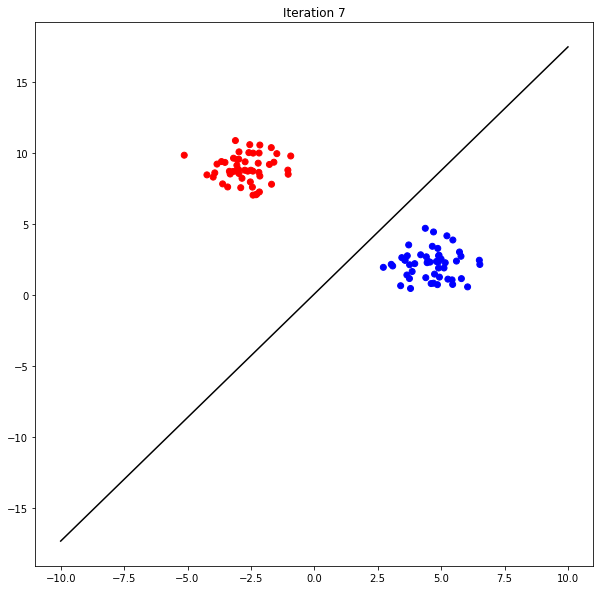

[ 0.36040971  8.93772233 -5.14077879]


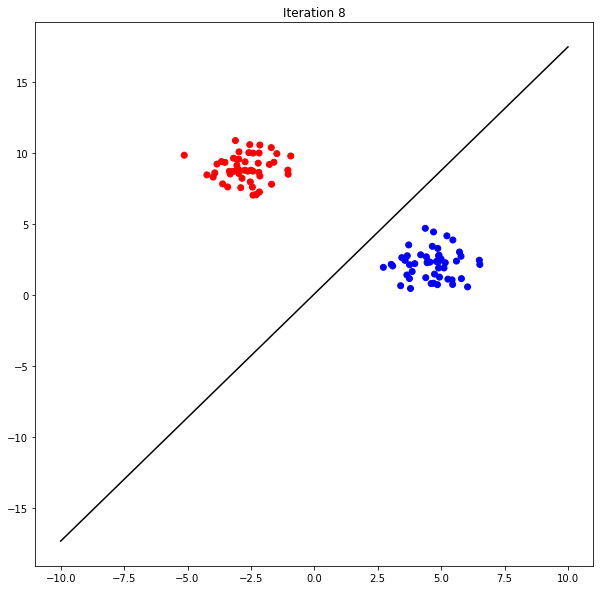

[ 0.36040971  8.93772233 -5.14077879]


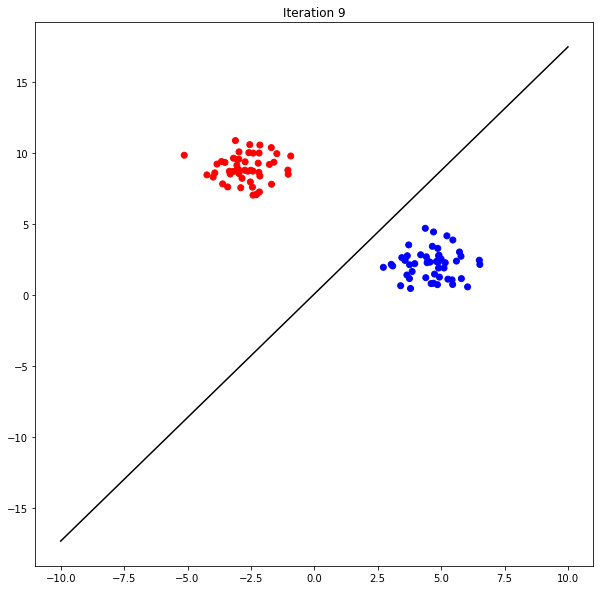

[ 0.36040971  8.93772233 -5.14077879]


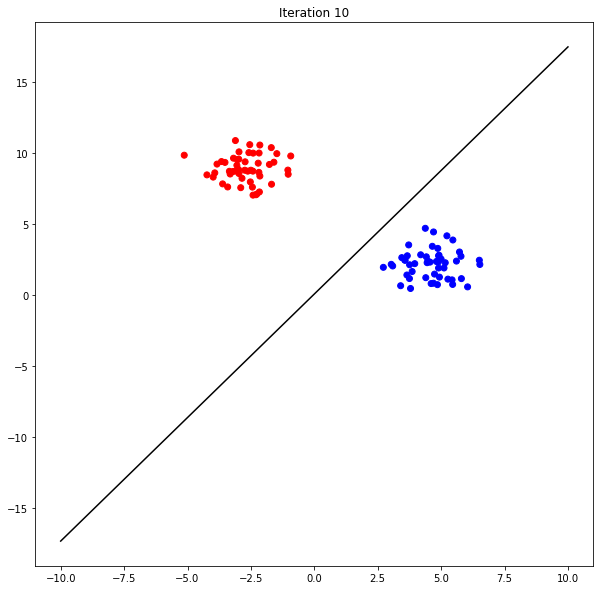

In [ ]:
for k in range(10): # Running the algorithm for 10 times
    xx = np.linspace(-10, 10)
    print(weights)
    yy = (-weights[0] - weights[1]*xx)/ weights[2]  # here the line equation is of the form ax+by+c=0

    for i in range(len(y)):
        p = np.matmul(aug_X[i], weights) # taking the product of augumented matrix and weights
        if(p >= 0 and y[i] == 0):
            weights -= aug_X[i]
        elif(p < 0 and y[i] == 1):
            weights += aug_X[i]

    plt.figure(figsize = (10, 10))
    # Assigning colours to data points
    point_color = []
    for i in y:
        if(i == 1):
            point_color.append('blue')
        else:
            point_color.append('red')
    plt.scatter(X[:,0], X[:,1], color = point_color)    # plotting the data points

    plt.plot(xx, yy, color = 'black')
    plt.title("Iteration {}".format(k+1))
    plt.show()


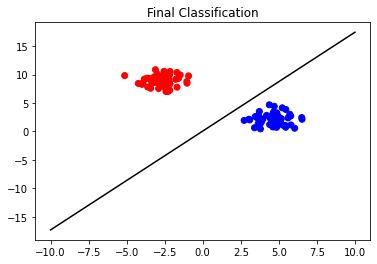

In [ ]:
# Final perceptron classification
plt.scatter(X[:,0], X[:,1], color = point_color)    # plotting the data points

plt.plot(xx, yy, color = 'black')
plt.title("Final Classification")
plt.show()


(Perceptron) Repeating the above exercise with batch gradients instead. Step size might need to be adjusted for convergenence.

In [ ]:
# Batch gradient means we send the entire data at once to train the model
# For this question, stopping criteria is "error < epsilon"

# (Another way of initializing weights) Generate normal random weights of size 3 with mean = 0, variance = 1
weights = np.random.normal(loc = 0, scale = 1, size = 3)
epsilon = 0.01  # Level of tolerance of error

step_size = 1000
# Step size should bring a difference in rate of convergence.
#But here, convergence can be observed within 3 iterations because of which there is no much difference
print(weights)

[-0.53920937  0.5918294  -0.87724502]


Error = -30095.56554286164
Batch gradient weights: [-5.39209375e-01  7.61033284e+03 -6.68323727e+03]


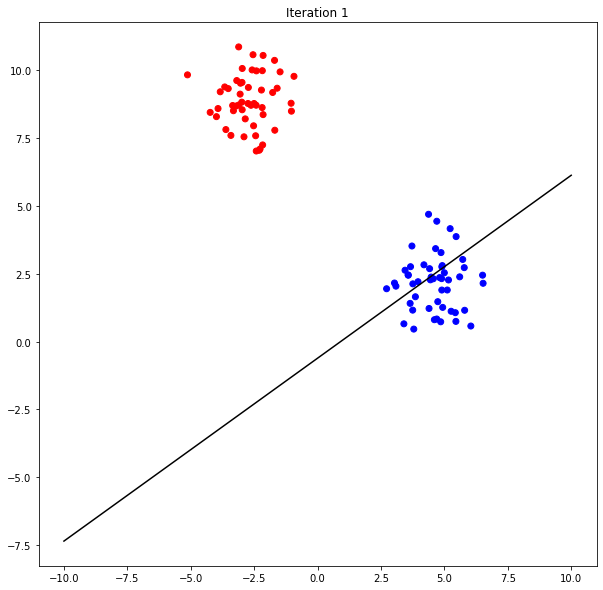

Error = 0
Batch gradient weights: [-5.39209375e-01  7.61033284e+03 -6.68323727e+03]


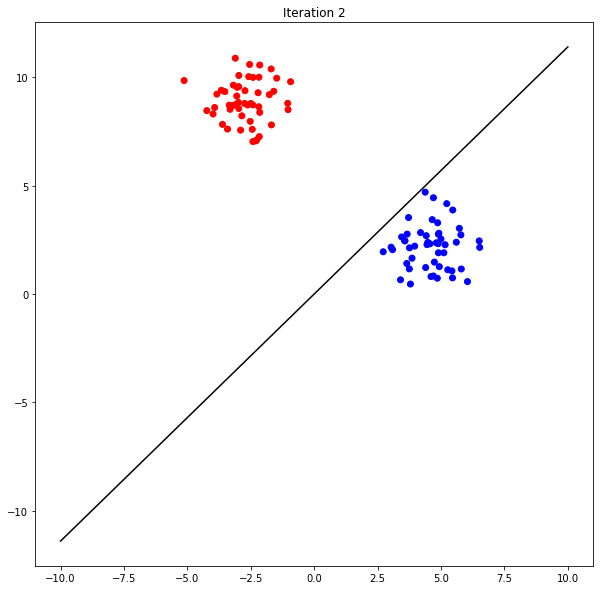

Model converged


In [ ]:
for k in range(10):
    error = 0       # setting the error to zero for every iteration
    xx = np.linspace(-10, 10)
    yy = (-weights[0] - weights[1]*xx)/ weights[2]

    for i in range(len(y)):

        p = np.matmul(aug_X[i], weights) # taking the product of augumented matrix and weights
        if(p >= 0 and y[i] == 0):
            weights -= step_size*aug_X[i]   # here we consider the step_size which we haven't considered in the first question
            error -= p
        elif(p < 0 and y[i] == 1):
            weights += step_size*aug_X[i]
            error += p

    print("Error = {}".format(error))
    print("Batch gradient weights: {}".format(weights))


    plt.figure(figsize = (10, 10))
    point_color = []
    for i in y:
        if(i == 1):
            point_color.append('blue')
        else:
            point_color.append('red')
    plt.scatter(X[:,0], X[:,1], color = point_color)    # plotting the data points

    plt.plot(xx, yy, color = 'black')
    plt.title("Iteration {}".format(1+k))
    plt.show()
    if(abs(error) < epsilon):
        print("Model converged")
        break

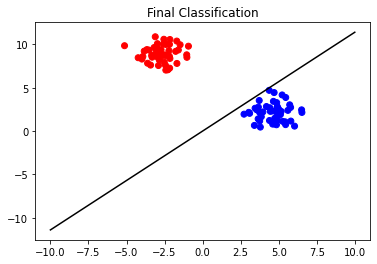

In [ ]:
# Final perceptron classification
plt.scatter(X[:,0], X[:,1], color = point_color)    # plotting the data points

plt.plot(xx, yy, color = 'black')
plt.title("Final Classification")
plt.show()



(Perceptron) Using the `make_circles` function in sklearn, create a dataset of 100 points with two classes forming concentric circles. Then, generate second-order features and train the perceptron on this dataset. Finally, visualize the decision boundary in the original two-dimensional space using the `contour` function.

In [ ]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples = 100)    #, factor = 0.8)
# We have generated 100 points which form two concentric circles

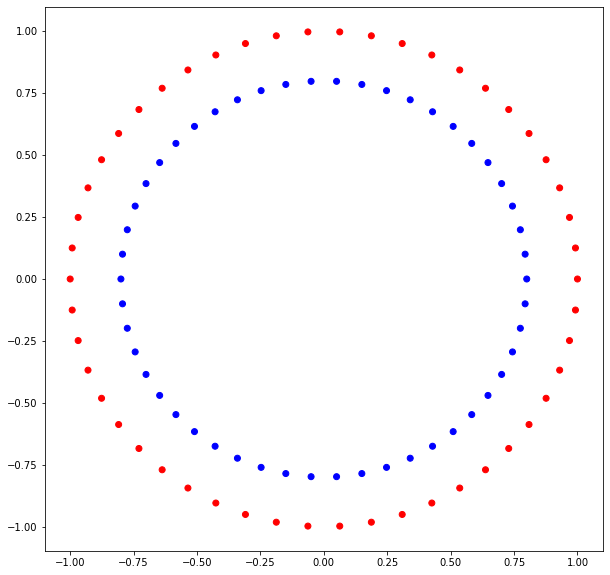

In [ ]:
plt.figure(figsize = (10,10))
point_color = []
for i in y:
    if(i == 1):
        point_color.append('blue')
    else:
        point_color.append('red')
plt.scatter(X[:,0], X[:,1], color = point_color)    # plotting the data points
plt.show()

It is separable, but clearly not linear. So you may think that a perceptron would not be good for this task. But the thing about a perceptron is that it’s decision boundary is linear in terms of the weights, not necessarily in terms of inputs. We can augment our input vectors x so that they contain non-linear functions of the original inputs.

In [ ]:
# Creating second order features, so the number of columns have doubled and now equals 6
# Basically, in a second order feature setup, the terms we have are of degree = 0, 1, 2
# Degree 0 terms - constant (only one term) whose corresponding weight is weight[0]
# Degree 1 terms - x, y (two terms) - whose corresponding weights are weight[1], weight[2]
# Degree 2 terms - x^2, y^2, xy (three terms) - whose corresponding weights are weight[3], weight[4], weight[5]


X_second_order = np.ones((len(y), 6))

X_second_order[:, 1:3] = X
X_second_order[:, 3] = X[:,0]**2
X_second_order[:, 4] = X[:,1]**2
X_second_order[:, 5] = X[:,0]*X[:,1]

In [ ]:
weights = np.random.normal(loc = 0, scale = 1, size = 6)
step_size = 1   # Depending on the step_size, the decision boundary changes

In [ ]:
# Running the perceptron algorithm for 10 times
for k in range(10):
    #flag = True
    error = 0       # setting the error to zero for every iteration
    for i in range(len(y)):
        p = np.matmul(X_second_order[i], weights) # taking the product of augumented matrix and weights
        if(p >= 0 and y[i] == 0):
            weights -= step_size*X_second_order[i]   # here we consider the step_size which we haven't considered in the first question
            error -= p
        elif(p < 0 and y[i] == 1):
            weights += step_size*X_second_order[i]
            error += p

    print("Error = {}".format(error))



Error = -24.399219944364447
Error = -12.80899267180501
Error = -4.337281855172458
Error = 0
Error = 0
Error = 0
Error = 0
Error = 0
Error = 0
Error = 0


In [ ]:
# Given the weights of corresponding terms, we provide each point to this function to check if it lies on the decision boundary on not.
# If the value is greater than or equal to zero, we consider that points lies on the decision boundary, else we discard it
def decision_boundary(X,y):
    temp = weights[0] + weights[1]*X + weights[2]*y + weights[3]*X*X + weights[4]*y*y + weights[5]*X*y
    return (temp >= 0)

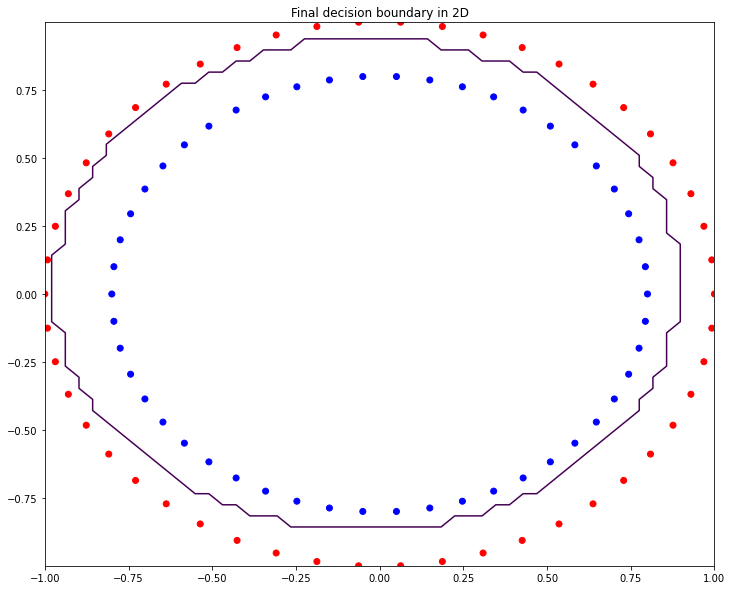

In [ ]:
xmin = min(X_second_order[:, 1])
xmax = max(X_second_order[:, 1])
ymin = min(X_second_order[:, 2])
ymax = max(X_second_order[:, 2])

xx = np.linspace(xmin,xmax)
yy = np.linspace(ymin, ymax)
P, Q = np.meshgrid(xx, yy)
zz = decision_boundary(P, Q)

plt.figure(figsize = (12,10))
plt.contour(xx, yy, zz)     # using the contour function, we show the final decision boundary
plt.scatter(X[:,0], X[:,1], c = point_color)
plt.title('Final decision boundary in 2D')
plt.show()



(Perceptron) We repeat the two perceptron examples using both make_blobs and make_circles functions to generate datasets with 1000 points each. Instead of visualizing the plots, we split each dataset into training (50%) and testing (50%) sets. After training the perceptron on the training data, we evaluate its accuracy on the test data and report the results for both cases.

In [ ]:
from sklearn.datasets import make_blobs
# Generating the dataset
X,y = make_blobs(n_samples = 1000, centers = 2, random_state = 42)

In [ ]:
aug_X = np.ones((1000, 3))   # Augumented matrix with last column containing bias
aug_X[:, 1:3] = X   # Making the first two ccolumns of augumented matrix as the matrix X

In [ ]:
# Now we split the data into 50% train and 50% test
X_train = aug_X[:500, :]    # considering the first 500 rows and all the columns
X_test = aug_X[500:, :]     # considering the last 500 rows and all the columns

y_train = y[:500]       # considering the first 500 values
y_test = y[500:]        # considering the last 500 values

In [ ]:
# Generate normal random weights of size 3 with mean = 0, variance = 1
weights = np.random.normal(loc = 0, scale = 10, size = 3)

In [ ]:
# Training the data
print("Initial weights: ", weights)
for k in range(10):
    error = 0       # setting the error to zero for every iteration
    for i in range(len(y_train)):
        p = np.matmul(X_train[i], weights) # taking the product of augumented matrix and weights
        if(p >= 0 and y[i] == 0):
            weights -= step_size*X_train[i]   # here we consider the step_size which we haven't considered in the first question
            error -= p
        elif(p < 0 and y[i] == 1):
            weights += step_size*X_train[i]
            error += p

    print("Error = {}".format(error))
    print("Batch gradient weights: {}".format(weights))

Initial weights:  [10.68831602  7.22754191  0.08485951]
Error = -21.85165649374121
Batch gradient weights: [10.68831602 10.0877617  -3.05116084]
Error = 0
Batch gradient weights: [10.68831602 10.0877617  -3.05116084]
Error = 0
Batch gradient weights: [10.68831602 10.0877617  -3.05116084]
Error = 0
Batch gradient weights: [10.68831602 10.0877617  -3.05116084]
Error = 0
Batch gradient weights: [10.68831602 10.0877617  -3.05116084]
Error = 0
Batch gradient weights: [10.68831602 10.0877617  -3.05116084]
Error = 0
Batch gradient weights: [10.68831602 10.0877617  -3.05116084]
Error = 0
Batch gradient weights: [10.68831602 10.0877617  -3.05116084]
Error = 0
Batch gradient weights: [10.68831602 10.0877617  -3.05116084]
Error = 0
Batch gradient weights: [10.68831602 10.0877617  -3.05116084]


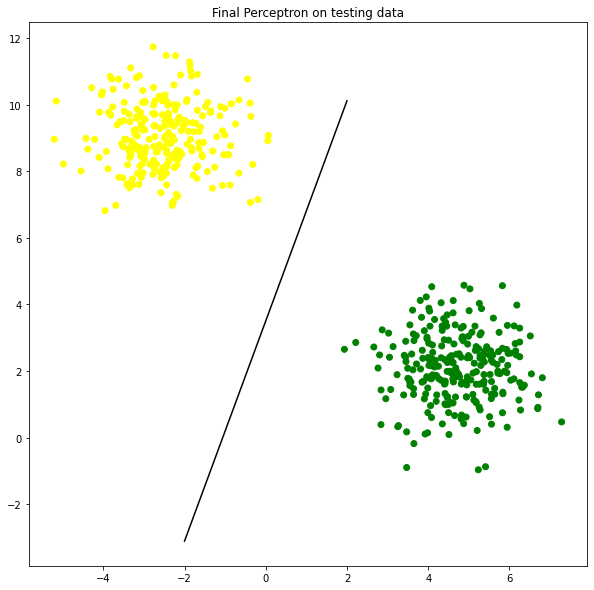

In [ ]:
# Testing the data
# To test the data, we simply have to merge two plots
# 1. The test data scatter plot
# 2. The hyperplane that we have generated due to training the model

plt.figure(figsize = (10, 10))
point_color = []
for i in y_test:
    if(i == 1):
        point_color.append('green')
    else:
        point_color.append('yellow')
plt.scatter(X_test[:,1], X_test[:,2], color = point_color)    # plotting the data points
xx = np.linspace(-2, 2)
yy = (-weights[0] - weights[1]*xx)/ weights[2]

plt.plot(xx, yy, color = 'black')
plt.title("Final Perceptron on testing data")
plt.show()

In [ ]:
#print(weights[0])
#print(X_test)
#print(y_test[i] > ((-weights[0] - weights[1]*X_test[i])/ weights[2]))

In [ ]:
# Now we are interested in calculating the accuracy of the perceptron
accuracy = 0

# Any line in 2D is of the form : y = mx + c
# Here, since we have two dimensions on the graph, we need to classify the points into two classes
# 1. the points above the hyperplane (they have y - mx - c > 0)
# 2. the points below the hyperplane (they have y - mx - c < 0)
# To know that we are taking a point belonging to a particular class, we use point_color array which stores a color denoting if the point belongs to a particular type

# provided, both the conditions are true for a given test point, we add it to the accuracy
for i in range(len(y_test)):
    if(X_test[i][2] - ((-weights[0] - weights[1]*X_test[i][1])/ weights[2]) > 0):
        condition1 = True
    else:
        condition1 = False

    if(point_color[i] == 'yellow'):
        condition2 = True
    else:
        condition2 = False

    if((condition1 == True and condition2 == True) or (condition1 == False and condition2 == False)):
        accuracy += 1

print("Test accuracy of the perceptron on make_blobs = {} %".format(accuracy*100/len(y_test)))

Test accuracy of the perceptron on make_blobs = 100.0 %


In [ ]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples = 1000)
# We have generated 100 points which form two concentric circles

In [ ]:
point_color = []
for i in y:
    if(i == 1):
        point_color.append('blue')
    else:
        point_color.append('red')


In [ ]:
# Creating second order features, so the number of columns have doubled and now equals 6
# Basically, in a second order feature setup, the terms we have are of degree = 0, 1, 2
# Degree 0 terms - constant (only one term) whose corresponding weight is weight[0]
# Degree 1 terms - x, y (two terms) - whose corresponding weights are weight[1], weight[2]
# Degree 2 terms - x^2, y^2, xy (three terms) - whose corresponding weights are weight[3], weight[4], weight[5]


X_second_order = np.ones((len(y), 6))

X_second_order[:, 1:3] = X
X_second_order[:, 3] = X[:,0]**2
X_second_order[:, 4] = X[:,1]**2
X_second_order[:, 5] = X[:,0]*X[:,1]


In [ ]:
X_train = X_second_order[:500, :]
X_test = X_second_order[500:, :]

y_train = y[:500]
y_test = y[500:]

In [ ]:
weights = np.random.normal(loc = 0, scale = 1, size = 6)
step_size = 1   # Depending on the step_size, the decision boundary changes

In [ ]:
# Running the perceptron algorithm for 10 times
for k in range(10):
    #flag = True
    error = 0       # setting the error to zero for every iteration
    for i in range(len(y_train)):
        p = np.matmul(X_train[i], weights) # taking the product of augumented matrix and weights
        if(p >= 0 and y[i] == 0):
            weights -= step_size*X_train[i]   # here we consider the step_size which we haven't considered in the first question
            error -= p
        elif(p < 0 and y[i] == 1):
            weights += step_size*X_train[i]
            error += p

    print("Error = {}".format(error))



Error = -57.37045249941603
Error = 0
Error = 0
Error = 0
Error = 0
Error = 0
Error = 0
Error = 0
Error = 0
Error = 0


In [ ]:
# Now, we calculate the accuracy of the model, by checking y(WX) >= 0 means correctly classified
accuracy = 0

temp = 1.0
for i in range(len(y_test)):
    if(y_test[i] * (np.matmul(weights.T, X_test[i]) > 0)):      # This is normal case when value is greater than zero
        accuracy += 1
    else:
        if(temp + y_test[i] * (np.matmul(weights.T, X_test[i])) == temp):   # As a special case, we handle the value = 0 case because 0.0 and -0.0 are different
            accuracy += 1

print("Test accuracy of the perceptron on make_circles = {} %".format(accuracy*100/len(y_test)))

Test accuracy of the perceptron on make_circles = 100.0 %


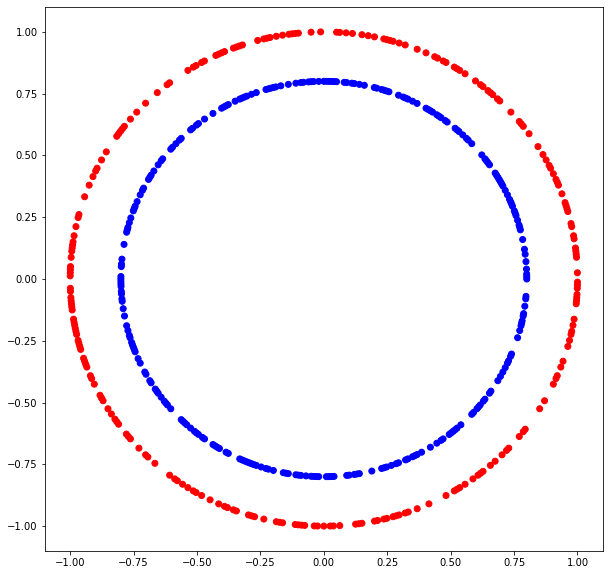

In [ ]:
plt.figure(figsize = (10,10))
point_color = []
for i in y_test:
    if(i == 1):
        point_color.append('blue')
    else:
        point_color.append('red')
plt.scatter(X_test[:,1], X_test[:,2], color = point_color)    # plotting the data points
plt.show()

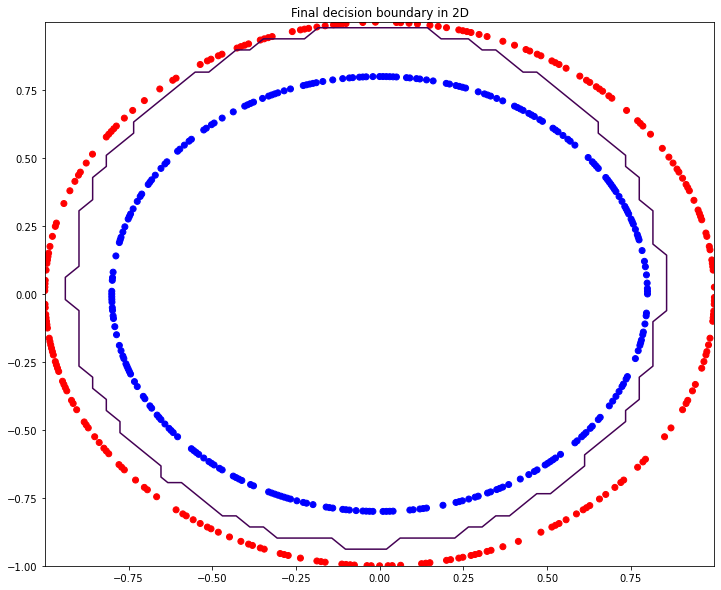

In [ ]:
xmin = min(X_test[:, 1])
xmax = max(X_test[:, 1])
ymin = min(X_test[:, 2])
ymax = max(X_test[:, 2])

xx = np.linspace(xmin,xmax)
yy = np.linspace(ymin, ymax)
P, Q = np.meshgrid(xx, yy)
zz = decision_boundary(P, Q)

plt.figure(figsize = (12,10))
plt.contour(xx, yy, zz)     # using the contour function, we show the final decision boundary
plt.scatter(X_test[:,1], X_test[:,2], color = point_color)
plt.title('Final decision boundary in 2D')
plt.show()